Coletando os 10 primeiros registros que tem o resultado igual a 1

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error 
import pandas as pd


data =pd.read_csv('treino.csv')
data_um = data[data['target'] == 1]
data_zero = data[data['target'] == 0]
print("a quantidade de registro com o resultado 1 é:" , data_um.count(axis = 0 ))
print("a quantidade de registro com o resultado 1 é:" , data_zero.count(axis = 0))

a quantidade de registro com o resultado 1 é: id        650
col_0     650
col_1     650
col_2     650
col_3     650
col_4     650
col_5     650
col_6     650
col_7     650
col_8     650
col_9     650
col_10    650
col_11    650
col_12    650
col_13    650
col_14    650
col_15    650
col_16    650
col_17    650
col_18    650
col_19    650
target    650
dtype: int64
a quantidade de registro com o resultado 1 é: id        4950
col_0     4950
col_1     4950
col_2     4950
col_3     4950
col_4     4950
col_5     4950
col_6     4950
col_7     4950
col_8     4950
col_9     4950
col_10    4950
col_11    4950
col_12    4950
col_13    4950
col_14    4950
col_15    4950
col_16    4950
col_17    4950
col_18    4950
col_19    4950
target    4950
dtype: int64


In [73]:
x = data.drop('target' , axis=1)



In [74]:
y = data.target


Arvore de decisão

In [75]:


x_treino , x_teste , y_treino , y_teste = train_test_split(x,y)

#instancia
modelo = DecisionTreeRegressor()

modelo.fit(x_treino , y_treino)

y_arvore_decisao = modelo.predict(x_teste)


resultado = r2_score(y_teste , y_arvore_decisao)

erro_quadratico_tree = mean_squared_error(y_teste , y_arvore_decisao)

value_arvore = modelo.predict(x)



print("o valor do primeiro é:" , int(value_arvore[0]))
print("erro médio: " , erro_quadratico_tree)
print(resultado)




o valor do primeiro é: 0
erro médio:  0.19214285714285714
-0.9626440974755581


Floresta aleatória

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Divida os dados em conjuntos de treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

# Crie e treine um modelo de Floresta Aleatória
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(x_treino, y_treino)

# Faça previsões no conjunto de teste
y_rf = modelo_rf.predict(x_teste)

# Avalie o desempenho do modelo de Floresta Aleatória
resultado_rf = r2_score(y_teste, y_rf)
erro_quadratico_rf = mean_squared_error(y_teste, y_rf)

# Faça previsões para novos dados (opcional)
novos_dados = x  # Substitua com seus próprios valores
value_rf = modelo_rf.predict(novos_dados)

print("Resultado da Floresta Aleatória:")
print("Erro Quadrático Médio:", erro_quadratico_rf)
print("R^2:", resultado_rf)
print("Previsão para novos dados:", int(value_rf[0]))


Resultado da Floresta Aleatória:
Erro Quadrático Médio: 0.0773174107142857
R^2: 0.22561591772859402
Previsão para novos dados: 0


Apagar As respostas da base de treinamento clonada

In [77]:
import csv

# Nome do arquivo CSV que você deseja modificar (substitua pelo seu próprio arquivo)
nome_arquivo = 'treino_clone.csv'

# Lista para armazenar os dados do CSV com a última coluna removida
dados_csv = []

# Abra o arquivo CSV e leia seus dados
with open(nome_arquivo, 'r', newline='') as arquivo_csv:
    leitor_csv = csv.reader(arquivo_csv)
    
    # Loop para ler cada linha do arquivo CSV e remover a última coluna
    for linha in leitor_csv:
        linha_sem_ultima_coluna = linha[:-1]  # Remove a última coluna
        dados_csv.append(linha_sem_ultima_coluna)

# Agora, você tem 'dados_csv' com a última coluna removida de cada registro

# Reabra o arquivo CSV em modo de escrita ("w") para sobrescrever os dados
with open(nome_arquivo, 'w', newline='') as arquivo_csv:
    escritor_csv = csv.writer(arquivo_csv)
    
    # Escreva os dados atualizados no arquivo
    escritor_csv.writerows(dados_csv)

print(f'A última coluna do arquivo {nome_arquivo} foi removida com sucesso.')


A última coluna do arquivo treino_clone.csv foi removida com sucesso.


Preencher uma tabela de teste que é clonada com a da base de treinamento


In [78]:
import csv

# Nome do arquivo CSV que você deseja modificar (substitua pelo seu próprio arquivo)
nome_arquivo = 'treino_clone.csv'

# Lista de valores que você deseja adicionar como a nova coluna "target" (substitua pelos seus próprios valores)
valores_target_float = (value_arvore)

valores_target = [int(valor) for valor in valores_target_float]

# Abra o arquivo CSV e leia seus dados
with open(nome_arquivo, 'r', newline='') as arquivo_csv:
    leitor_csv = csv.reader(arquivo_csv)
    
    # Crie uma lista para armazenar os dados do CSV com a nova coluna "target"
    dados_csv_com_target = []

    primeira_linha = next(leitor_csv)
    primeira_linha.append("target")
    dados_csv_com_target.append(primeira_linha)

    # Loop para ler cada linha do arquivo CSV e adicionar a nova coluna "target"
    for linha, valor_target in zip(leitor_csv, valores_target):
        linha.append((valor_target))  # Adiciona o valor da nova coluna
        dados_csv_com_target.append(linha)

# Reabra o arquivo CSV em modo de escrita ("w") para sobrescrever os dados
with open(nome_arquivo, 'w', newline='') as arquivo_csv:
    escritor_csv = csv.writer(arquivo_csv)
    
    # Escreva os dados atualizados no arquivo, agora com a nova coluna "target"
    escritor_csv.writerows(dados_csv_com_target)

print(f'A nova coluna "target" foi adicionada ao arquivo {nome_arquivo} com sucesso.')


A nova coluna "target" foi adicionada ao arquivo treino_clone.csv com sucesso.


Agora vou comparar as duas tabelas e analisar o percentual de acerto dos modelos

In [79]:
import csv

# Nomes dos arquivos CSV que você deseja comparar (substitua pelos seus próprios arquivos)
arquivo1 = 'treino.csv'
arquivo2 = 'treino_clone.csv'

# detalhes dos valores dos registros 
total_registros_zero = 4950
total_registros_um = 650

total_registros = 5601

# Inicialize um contador para contar as correspondências nas mesmas linhas e numeros
correspondencias_na_mesma_linha = 0
acertos_zero = 0
acertos_um = 0


# Abra o primeiro arquivo CSV e leia seus dados
with open(arquivo1, 'r', newline='') as arquivo_csv1:
    leitor_csv1 = csv.reader(arquivo_csv1)
    # Pule o cabeçalho, se houver
    cabecalho1 = next(leitor_csv1, None)
    
    # Abra o segundo arquivo CSV e leia seus dados
    with open(arquivo2, 'r', newline='') as arquivo_csv2:
        leitor_csv2 = csv.reader(arquivo_csv2)
        # Pule o cabeçalho, se houver
        cabecalho2 = next(leitor_csv2, None)

        # Loop para comparar os valores da coluna "Target" nas mesmas linhas
        for linha1, linha2 in zip(leitor_csv1, leitor_csv2):
            valor_target1 = linha1[-1]  # Último valor da linha1
            valor_target2 = linha2[-1]  # Último valor da linha2

            if valor_target1 == valor_target2:
                correspondencias_na_mesma_linha += 1
                if(valor_target1 == '0'):
                    acertos_zero += 1

                else:
                    acertos_um += 1


# Exiba o número de correspondências nas mesmas linhas
print(f'Número de correspondências nas mesmas linhas: {correspondencias_na_mesma_linha}')
print(f'Número de acertos com target igual a 0: {acertos_zero}')
print(f'Número de acertos com target igual a 1: {acertos_um}')


# calculo de percentual de acerto
percentual_acertos_total = (correspondencias_na_mesma_linha/total_registros) * 100
percentual_acertos_zero = (acertos_zero/total_registros_zero) * 100
percentual_acertos_um = (acertos_um/total_registros_um) * 100

print(f'Percentual de acertos total: {percentual_acertos_total}%')
print('Percentual de acertos de valores igual a 0: {:.2f}%'.format(percentual_acertos_zero))
print('Percentual de acertos de valores igual a 1: {:.2f}%'.format(percentual_acertos_um))


Número de correspondências nas mesmas linhas: 5331
Número de acertos com target igual a 0: 4795
Número de acertos com target igual a 1: 536
Percentual de acertos total: 95.17943224424211%
Percentual de acertos de valores igual a 0: 96.87%
Percentual de acertos de valores igual a 1: 82.46%


Preenchendo a base de treino com a arvore de decisão

In [80]:
base_teste = "teste_clone.csv"


# Lista de valores que você deseja adicionar como a nova coluna "target" (substitua pelos seus próprios valores)
valores_target_float = (value_arvore)

valores_target = [int(valor) for valor in valores_target_float]

# Abra o arquivo CSV e leia seus dados
with open(base_teste, 'r', newline='') as arquivo_csv:
    leitor_csv = csv.reader(arquivo_csv)
    
    # Crie uma lista para armazenar os dados do CSV com a nova coluna "target"
    dados_csv_com_target = []

    primeira_linha = next(leitor_csv)
    primeira_linha.append("target")
    dados_csv_com_target.append(primeira_linha)

    # Loop para ler cada linha do arquivo CSV e adicionar a nova coluna "target"
    for linha, valor_target in zip(leitor_csv, valores_target):
        linha.append((valor_target))  # Adiciona o valor da nova coluna
        dados_csv_com_target.append(linha)

# Reabra o arquivo CSV em modo de escrita ("w") para sobrescrever os dados
with open(base_teste, 'w', newline='') as arquivo_csv:
    escritor_csv = csv.writer(arquivo_csv)
    
    # Escreva os dados atualizados no arquivo, agora com a nova coluna "target"
    escritor_csv.writerows(dados_csv_com_target)

print(f'A nova coluna "target" foi adicionada ao arquivo {base_teste} com sucesso.')


A nova coluna "target" foi adicionada ao arquivo teste_clone.csv com sucesso.


Avaliando o modelo


In [88]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

y_pred_validacao = modelo.predict(x_teste)

# Avalie o desempenho do modelo no conjunto de validação
precisao = precision_score(y_teste, y_pred_validacao)
revocacao = recall_score(y_teste, y_pred_validacao)
medida_f = f1_score(y_teste, y_pred_validacao)

# Exibir as métricas
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("Medida-F:", medida_f)


AttributeError: 'DecisionTreeRegressor' object has no attribute 'predict_proba'

formatando a planilha para exibir apenas o id e o target

In [90]:
teste = pd.read_csv('teste_clone.csv')

teste_original = teste[['id' , 'target']]

teste_original.to_csv('teste_original.csv' , index=False)

Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression

x = data.drop('target' , axis=1)


modelo_regressao = LinearRegression()

modelo_regressao.fit(x_treino , y_treino)

y_regressao = modelo_regressao.predict(x_teste)

resultado_regressao = r2_score(y_teste , y_regressao)

erro_quadratico_regressao = mean_squared_error(y_teste , y_regressao)

value = modelo_regressao.predict(x)

print("o valor do primeiro é:" , (value[0]))
print("erro médio: " , erro_quadratico_regressao)
print("r2:" ,resultado)

o valor do primeiro é: 0.169587037415308
erro médio:  0.09344568507560089
r2: -0.3781852956066829


In [ ]:
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score , mean_squared_error

data = pd.read_csv('treino.csv')

#meu conjunto de dados 

x = data.drop('target' , axis=1)

# os rótulos dos meus dados 

y = data.target

# machine learnig

x_treino , x_teste , y_treino , y_teste = train_test_split(x,y)

#instancia de modelo
modelo_regressao = LinearRegression()

modelo_regressao.fit(x_treino , y_treino)

y_regressao = modelo_regressao.predict(x_teste)

resultado_regressao = r2_score(y_teste , y_regressao)

erro_quadratico_regressao = mean_squared_error(y_teste , y_regressao)

value = modelo_regressao.predict(x)

print("erro quadrado médio: " , erro_quadratico_regressao)
print("r2:" , resultado_regressao)
print("resultado" , value[0])




erro quadrado médio:  0.10024606466333211
r2: 0.05555070568436238
resultado 0.1727789141909337


Plotar um gráfico, demostrando os resultados em que o target é igual a 1 no modelo de regressao

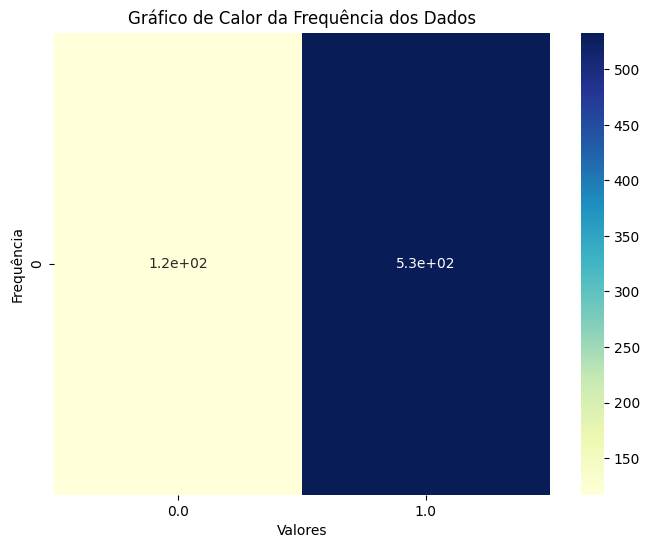

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_um = data[data['target'] == 1]
x_um = data_um.drop('target' , axis=1)
value_um = modelo.predict(x_um)

valores_unicos , frequencia = np.unique(value_um , return_counts=True)

# Crie um gráfico de calor
plt.figure(figsize=(8, 6))
sns.heatmap(frequencia.reshape(1, -1), annot=True, cmap="YlGnBu", xticklabels=valores_unicos)

# Configure os rótulos dos eixos
plt.xlabel("Valores")
plt.ylabel("Frequência")



# Mostre o gráfico
plt.title("Gráfico de Calor da Frequência dos Dados")
plt.show()